In [1]:
import tensorflow as tf

2025-07-02 14:05:13.903167: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


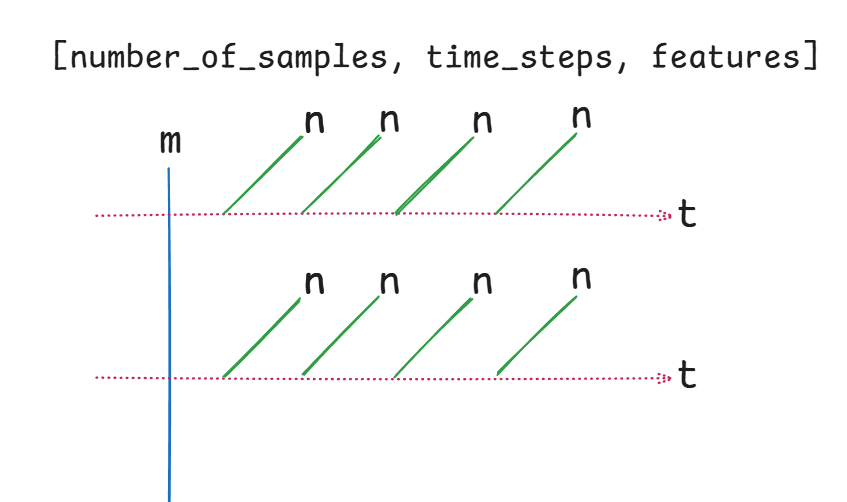

In [21]:
seq = tf.random.uniform(shape=[1, 20, 2]) 

In [22]:
seq.shape

TensorShape([1, 20, 2])

In [23]:
simple_rnn_layer = tf.keras.layers.SimpleRNN(5)

## RNN Weights 

In [26]:
simple_rnn_layer.weights

[<KerasVariable shape=(2, 5), dtype=float32, path=simple_rnn_2/simple_rnn_cell/kernel>,
 <KerasVariable shape=(5, 5), dtype=float32, path=simple_rnn_2/simple_rnn_cell/recurrent_kernel>,
 <KerasVariable shape=(5,), dtype=float32, path=simple_rnn_2/simple_rnn_cell/bias>]

In [12]:
'''
Total number of weigths = 
  1*5 (units * n (input dim) ) 
+ 5*5 (weights from and within the units -Memory Cells-)
+ 5 (Bias)
'''

In [13]:
# For Simple RNN: [(Units * Units) + (n_input_dim * Units) + (Units * 1)] * 1

## RNN Output Shape 

In [40]:
simple_rnn_layer_1 = tf.keras.layers.SimpleRNN(5, 
                                               return_sequences=True # To output all Hs
                                              )

In [41]:
rnn_output_1 = simple_rnn_layer_1(seq)

In [42]:
rnn_output_1.shape

TensorShape([1, 20, 5])

In [37]:
seq.shape

TensorShape([1, 20, 2])

In [47]:
seq_w = tf.random.uniform(shape=[100, 50, 1])

In [48]:
rnn_output_2 = simple_rnn_layer_1(seq_w)

2025-07-02 14:30:22.278220: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INVALID_ARGUMENT: Matrix size-incompatible: In[0]: [100,1], In[1]: [2,5]


InvalidArgumentError: Exception encountered when calling SimpleRNNCell.call().

[1m{{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [100,1], In[1]: [2,5] [Op:MatMul] name: [0m

Arguments received by SimpleRNNCell.call():
  • sequence=tf.Tensor(shape=(100, 1), dtype=float32)
  • states=('tf.Tensor(shape=(100, 5), dtype=float32)',)
  • training=False

In [46]:
rnn_output_1.shape, rnn_output_2.shape

(TensorShape([1, 20, 5]), TensorShape([100, 50, 5]))